# Linear regression demo

Load packages we will use

In [26]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# Basic python

In [27]:
# basic math 
2+2

4

In [28]:
2*pi

6.283185307179586

In [30]:
2 * np.pi

6.283185307179586

In [5]:
# lists
a = [1, 2, 3]
a

[1, 2, 3]

In [6]:
a.append(17)
a

[1, 2, 3, 17]

In [7]:
# python uses 0-based indexing 
a[0]

1

In [8]:
# dictionaries 
d = {'a': 1, 'b': 2, 'c': 3}
d

{'a': 1, 'b': 2, 'c': 3}

In [9]:
d['b']

2

In [10]:
d['d']

KeyError: 'd'

In [11]:
d['d'] = 4
d['d']

4

In [12]:
# for loops
for i in range(10):
    print("hello", i)

hello 0
hello 1
hello 2
hello 3
hello 4
hello 5
hello 6
hello 7
hello 8
hello 9


In [13]:
# functions, if statements
def fibonacci(n):
    if n==0:
        return 1
    else:
        return n*fibonacci(n-1)
    
fibonacci(5)

120

# Jupyter workflow tips

* run a cell with Shift-Enter
* Jupyter displays value of last expression in cell 
* open a new cell below the current one (Alt-Enter) to see values of variables, test assumptions
* you can reorder cells using the arrows in the toolbar, or by copy-pasting cells up or down

# Electricity usage example

In [14]:
usage = pd.read_csv('elec_usage.txt')
usage.head()

,month,year,usage,temperature
0,8,1989,24.828,73
1,9,1989,24.688,67
2,10,1989,19.310,57
3,11,1989,59.706,43
4,12,1989,99.667,26


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ff6f518>,
      dtype=object)

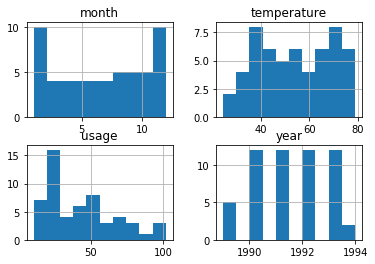

In [15]:
usage.hist()

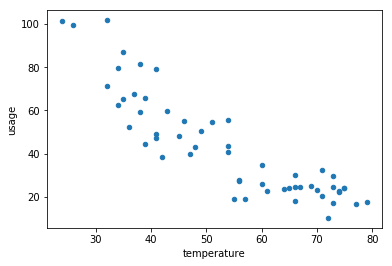

In [17]:
usage.plot.scatter(x='temperature', y='usage')

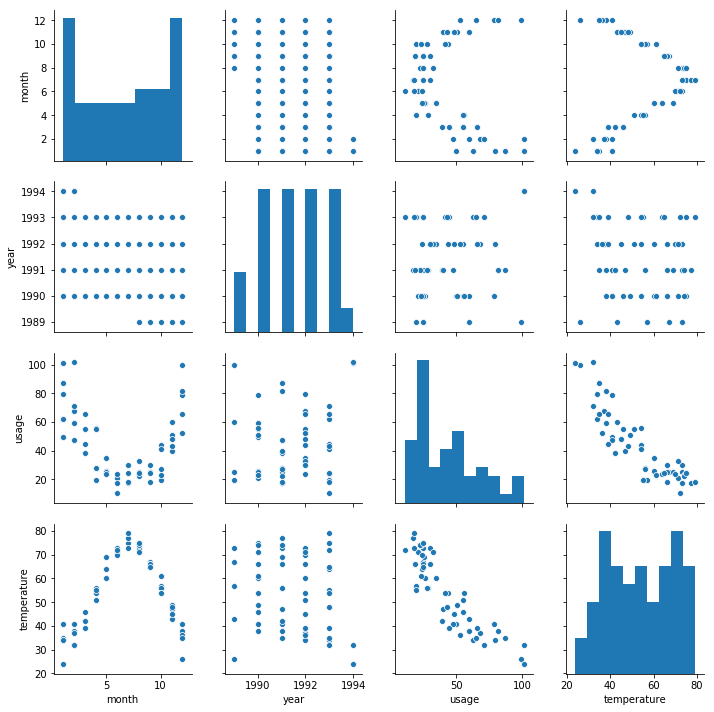

In [18]:
seaborn.pairplot(usage)

In [19]:
# add two more predictors: nonlinear functions of original variables
usage['tempsqr'] = usage['temperature']^2
usage['yearcts'] = usage['year'] + (usage['month']-1)/12
usage.head()

,month,year,usage,temperature,tempsqr,yearcts
0,8,1989,24.828,73,75,1989.583333
1,9,1989,24.688,67,65,1989.666667
2,10,1989,19.310,57,59,1989.750000
3,11,1989,59.706,43,41,1989.833333
4,12,1989,99.667,26,24,1989.916667


In [20]:
variables = list(usage.columns)
variables

['month', 'year', 'usage', 'temperature', 'tempsqr', 'yearcts']

In [21]:
features = variables[0:2] + variables[3:]
features

['month', 'year', 'temperature', 'tempsqr', 'yearcts']

In [22]:
target = variables[2]
target

'usage'

In [37]:
X = usage[features] # the design matrix
Y = usage[target]   # the target vector
X.head() 

,month,year,temperature,tempsqr,yearcts
0,8,1989,73,75,1989.583333
1,9,1989,67,65,1989.666667
2,10,1989,57,59,1989.750000
3,11,1989,43,41,1989.833333
4,12,1989,26,24,1989.916667


In [31]:
# more concise way of collecting data
Y, X = dmatrices('usage ~ 0 + temperature + np.power(temperature, 2) + month + year + yearcts', data=usage, return_type='dataframe')
X.head()

,temperature,"np.power(temperature, 2)",month,year,yearcts
0,73.0,5329.0,8.0,1989.0,1989.583333
1,67.0,4489.0,9.0,1989.0,1989.666667
2,57.0,3249.0,10.0,1989.0,1989.750000
3,43.0,1849.0,11.0,1989.0,1989.833333
4,26.0,676.0,12.0,1989.0,1989.916667


modifications:
    * add an intercept to the model
    * add other nonlinear terms

In [32]:
# fit a least squares model
model = sm.OLS(Y, X).fit()
Yhat = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  usage   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     70.68
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           5.88e-20
Time:                        09:41:11   Log-Likelihood:                -200.23
No. Observations:                  55   AIC:                             410.5
Df Residuals:                      50   BIC:                             420.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
temperature             

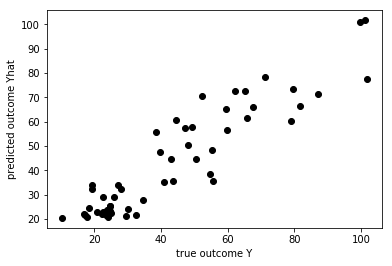

In [33]:
# Plot outputs
plt.scatter(Y, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

plt.show()

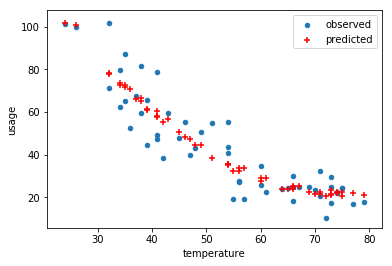

In [34]:
# plot observed vs predicted usage as a function of temperature
p = usage.plot.scatter(x='temperature', y='usage', label='observed')
p.scatter(x=usage['temperature'], y=Yhat, color='r', marker="+", label='predicted')
plt.legend()

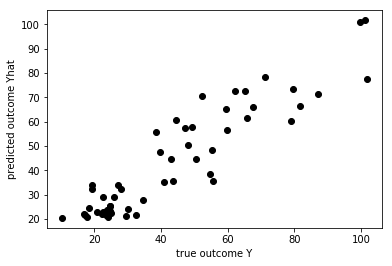

In [35]:
# let's make a function to plot predictions against truth
def plot_fit(Y, Yhat):
    plt.scatter(Y, Yhat,  color='black')
    plt.xlabel("true outcome Y")
    plt.ylabel("predicted outcome Yhat")

    plt.show()
    
plot_fit(Y, Yhat)

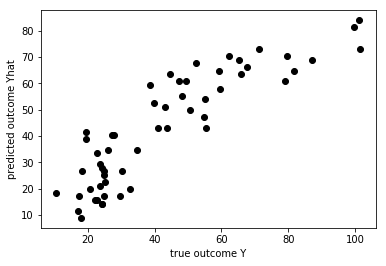

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  usage   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           4.35e-19
Time:                        09:42:00   Log-Likelihood:                -210.65
No. Observations:                  55   AIC:                             425.3
Df Residuals:                      53   BIC:                             429.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     116.7162      5.565     20.973      0.000     105.554     127.878
temperature    -1.3646      0.099    -13.727      0.000      -1.564      -1.165
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.474
Skew:                           0.131   Prob(JB):                        0.789
Kurtosis:                       2.627   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# we could even make a function to help us visually search for a good model 

def assess_model_quality(data, formula):
    Y, X = dmatrices(formula, data=data, return_type='dataframe')
    model = sm.OLS(Y, X).fit()
    Yhat = model.predict(X)
    plot_fit(Y, Yhat)
    return model.summary()
    
assess_model_quality(usage, 'usage ~ 1 + temperature')

# What do p-values mean?

In [51]:
n = 20
y = np.random.randn(n)
x = np.random.randn(n)
model = sm.OLS(y, x).fit()

In [52]:
model.pvalues

array([0.18017005])

In [65]:
pvalues = []
for i in range(1000):
    n = 20
    y = np.random.randn(n)
    x = np.random.randn(n)
    model = sm.OLS(y, x).fit()
    pvalues.append(model.pvalues[0])

(array([1.02022338, 0.97421331, 1.00421988, 1.14024966, 0.90419798,
        1.00421988, 0.96021024, 0.99821856, 0.99021681, 1.02422426,
        0.97821418, 0.98621593, 0.96421112, 1.01222163, 1.04022776,
        0.93820542, 0.99021681, 1.00822075, 1.06623345, 1.000219  ]),
 array([1.17071248e-04, 5.01061237e-02, 1.00095176e-01, 1.50084228e-01,
        2.00073281e-01, 2.50062333e-01, 3.00051386e-01, 3.50040438e-01,
        4.00029491e-01, 4.50018543e-01, 5.00007595e-01, 5.49996648e-01,
        5.99985700e-01, 6.49974753e-01, 6.99963805e-01, 7.49952857e-01,
        7.99941910e-01, 8.49930962e-01, 8.99920015e-01, 9.49909067e-01,
        9.99898119e-01]),
 <a list of 20 Patch objects>)

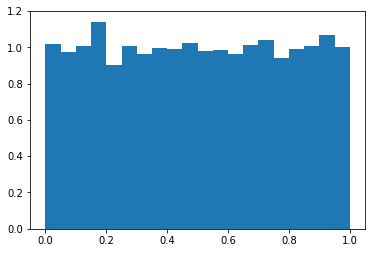

In [66]:
plt.hist(pvalues, bins=20, density=True)

In [67]:
# around 5% of the pvalues are <.05, just by random chance 
sum(np.array(pvalues) <= .05) / len(pvalues)

0.051

# Now let's fit the same model, using sklearn

In [ ]:
lm = LinearRegression()
model = lm.fit(X,Y)
model

In [ ]:
Yhat = lm.predict(X)
Yhat[:5]

In [ ]:
# how well does the model fit? 
lm.score(X,Y) # R^2 score

In [ ]:
# what about the coefficients?
lm.coef_

In [ ]:
# and the intercept β_0
lm.intercept_

In [ ]:
# and visualize the fit 
plot_fit(Y, Yhat)